#   Preprocesamiento de Datos
##  ¿Qué aprenderemos hoy?
-   Tratar los valores perdidos en un conjunto de datos
-   Tratar con diferentes tipos de variables (contínuas y discretas)
-   Estudiar subgrupos de variables incluidas en conjuntos de datos
-   Librería Pandas
Documentación DataFrame
#   Tratar con Valores Perdidos (datos)
-   Espacio en blanco o información inconsistente
-   NaN (no hay número)
-   Null (valores desconocidos)
##  Datos Continuos
-   Lecturas de datos en formato csv.


In [57]:
import pandas as pd
df= pd.read_csv("Imagenes_Clase_07/Imagenes_Clase_07/Clase7_CSV.csv",header=0)
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [58]:
df.head(2)

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0


In [59]:
df.dtypes

A    float64
B    float64
C    float64
D    float64
dtype: object

In [60]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [61]:
df.dropna(axis=0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [62]:
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [63]:
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [64]:
df.dropna(thresh=3)

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [65]:
df.dropna(subset=['D'])


,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0


In [66]:
df.values


array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

**¿Qué hacer con los datos perdidos**

**¿Simplemente los eliminamos?**

In [67]:
import numpy as np
from sklearn.impute import SimpleImputer
imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [68]:
df[['A','B','C','D']] = imputed_data
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.5,8.0
2,10.0,11.0,12.0,6.0


¿Cómo obtenemos la media de cada columna?


In [69]:
df.describe()


,A,B,C,D
count,3.000000,3.000000,3.00,3.0
mean,5.333333,6.333333,7.50,6.0
std,4.509250,4.509250,4.50,2.0
min,1.000000,2.000000,3.00,4.0
25%,3.000000,4.000000,5.25,5.0
50%,5.000000,6.000000,7.50,6.0
75%,7.500000,8.500000,9.75,7.0
max,10.000000,11.000000,12.00,8.0


##  Procesando Datos Categóricos
-   Ordinales: Valores categóricos que pueden ordenarse.
-   Nominales: Valores categóricos que no pueden ordenarse.

In [70]:
df = pd.DataFrame([['green', 'M', 10.1, 'class2',0.0],
                   ['red', 'L', 13.5, 'class1',0.0],
                   ['blue', 'XL', 15.3, 'class2',0.0],
                   ['blue', 'XL', 0.0, 'class2',1.0]])
df.columns = ['color', 'size', 'price', 'class_label', 'metric']
df

,color,size,price,class_label,metric
0,green,M,10.1,class2,0.0
1,red,L,13.5,class1,0.0
2,blue,XL,15.3,class2,0.0
3,blue,XL,0.0,class2,1.0


**Los algoritmos que conocemos ¿podríamos ajustarlos directamente a partir del Dataframe anterior?**

In [71]:
df.isin([0.0])


,color,size,price,class_label,metric
0,False,False,False,False,True
1,False,False,False,False,True
2,False,False,False,False,True
3,False,False,True,False,False


In [72]:
df.isin([0.0]).sum()


color          0
size           0
price          1
class_label    0
metric         3
dtype: int64

In [73]:
df.drop(columns=['metric'])


,color,size,price,class_label
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2
3,blue,XL,0.0,class2


**Los algoritmos que conocemos ¿podríamos ajustarlos directamente a partir del Dataframe anterior?**

In [74]:
size_mapping = {'XL': 3,'L': 2,'M': 1}
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,class_label,metric
0,green,1,10.1,class2,0.0
1,red,2,13.5,class1,0.0
2,blue,3,15.3,class2,0.0
3,blue,3,0.0,class2,1.0


In [75]:
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['class_label']))}
class_mapping

{'class1': 0, 'class2': 1}

In [76]:
df['class_label'] = df['class_label'].map(class_mapping)
df

,color,size,price,class_label,metric
0,green,1,10.1,1,0.0
1,red,2,13.5,0,0.0
2,blue,3,15.3,1,0.0
3,blue,3,0.0,1,1.0


In [77]:
y = df.iloc[:,3].values
y

array([1, 0, 1, 1], dtype=int64)

In [78]:
X = df[['color', 'size', 'price']].values
X

array([['green', 1, 10.1],
       ['red', 2, 13.5],
       ['blue', 3, 15.3],
       ['blue', 3, 0.0]], dtype=object)

**Los algoritmos que conocemos ¿podríamos ajustarlos directamente a partir de X e y?**

In [79]:
X = pd.get_dummies(df[['price', 'size', 'color']]).values
X

array([[10.1,  1. ,  0. ,  1. ,  0. ],
       [13.5,  2. ,  0. ,  0. ,  1. ],
       [15.3,  3. ,  1. ,  0. ,  0. ],
       [ 0. ,  3. ,  1. ,  0. ,  0. ]])

In [80]:
print('Conjunto de Variables o Características:\n',X)
print('Conjunto de Etiquetas de Clase:\n',y)

Conjunto de Variables o Características:
 [[10.1  1.   0.   1.   0. ]
 [13.5  2.   0.   0.   1. ]
 [15.3  3.   1.   0.   0. ]
 [ 0.   3.   1.   0.   0. ]]
Conjunto de Etiquetas de Clase:
 [1 0 1 1]


##  Trabajando con una Base de Datos real

In [81]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']
df_wine

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [82]:
df_wine.describe()


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [83]:
print('Etiquetas de clase', np.unique(df_wine['Class label']))


Etiquetas de clase [1 2 3]


In [84]:
df_wine.isnull().sum()


Class label                     0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [85]:
df_wine.describe(include='all')


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [86]:
df_wine.iloc[:,0] = df_wine.iloc[:,0].astype('category')


In [87]:
df_wine.describe(include='all')


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.0,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
unique,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,71.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,NaN,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,NaN,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,NaN,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,NaN,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,NaN,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000


In [88]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

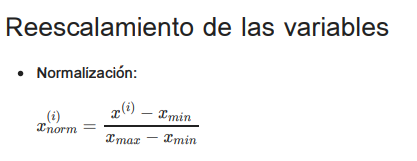

In [89]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)
print(X_train_norm.min(axis=0))
print(X_test_norm.min(axis=0))
print(X_train_norm.max(axis=0))
print(X_test_norm.max(axis=0))


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[-0.11111111  0.03162055 -0.22222222 -0.04301075  0.13580247  0.04137931
  0.02742616  0.08       -0.00316456 -0.04085258  0.06382979  0.00732601
  0.02639087]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.87134503 0.76482213 0.79738562 0.83870968 1.13580247 0.98965517
 0.71940928 1.06       0.90506329 0.79396092 1.30851064 0.97069597
 0.85734665]


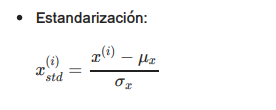

In [90]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
print(X_train_std.mean(axis=0))
print(X_test_std.mean(axis=0))
print(X_train_std.std(axis=0))
print(X_test_std.std(axis=0))

[ 6.89009781e-15  1.68324136e-16  3.79965996e-15  2.85613826e-16
 -3.17846108e-16  1.66264851e-15  1.59818395e-16 -1.19886180e-15
  1.88827448e-15 -1.61519543e-15 -5.78390382e-16  8.63108868e-16
 -1.33405831e-16]
[-0.1318345  -0.0491735  -0.22627857 -0.30383535  0.15310658 -0.15936527
 -0.11266284 -0.168936   -0.27922828 -0.04400477  0.04861124 -0.03648291
 -0.08032581]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.93708152 0.83330432 1.04921669 0.97051321 1.03524959 1.04021838
 0.91738292 1.06816875 0.85610305 0.93005067 1.1023964  1.06946918
 0.877016  ]


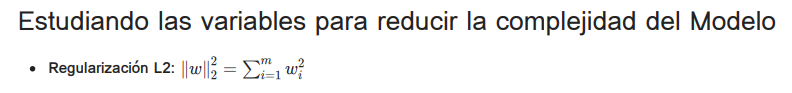

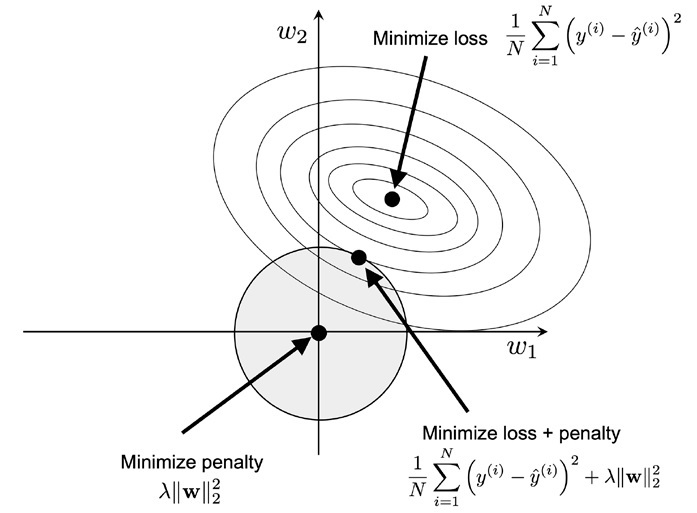

In [91]:
from IPython.display import Image
Image(filename=r'Imagenes_Clase_07/Imagenes_Clase_07/7_1.jpg', width=540)


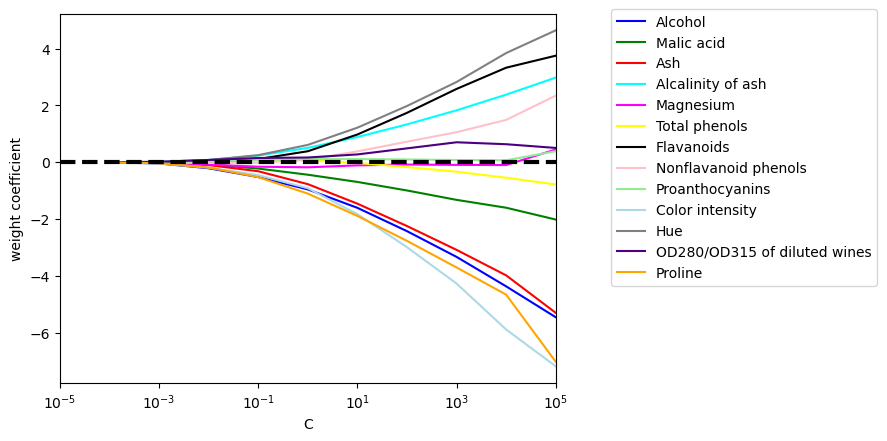

In [92]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black',
          'pink', 'lightgreen', 'lightblue', 'gray', 'indigo', 'orange']
weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l2', C=10.**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
weights = np.array(weights)
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params,weights[:, column],label=df_wine.columns[column + 1],color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center',bbox_to_anchor=(1.38,1.03),ncol=1,fancybox=True)
#plt.savefig('images/04_07.png', dpi=300,
# bbox_inches='tight', pad_inches=0.2)
plt.show()


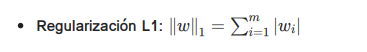

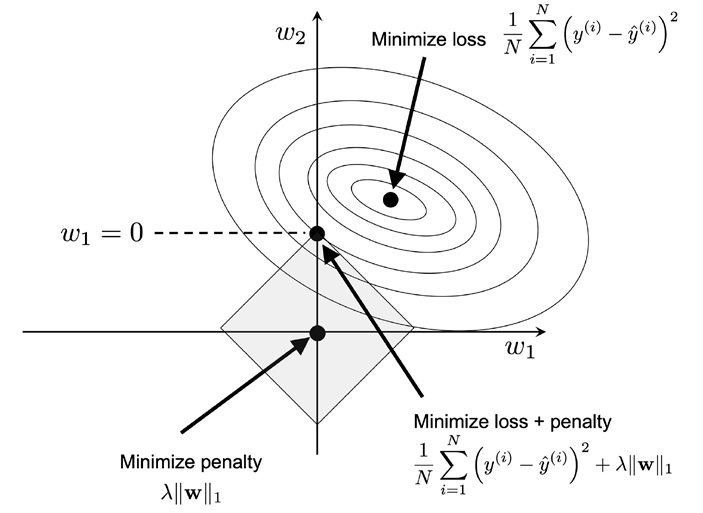

In [93]:
Image(filename=r'Imagenes_Clase_07/Imagenes_Clase_07/7_2.jpg', width=540)


c:\Users\newma\anaconda3\envs\IMA539_2024_2\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\newma\anaconda3\envs\IMA539_2024_2\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\newma\anaconda3\envs\IMA539_2024_2\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\newma\anaconda3\envs\IMA539_2024_2\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\newma\anaconda3\envs\IMA539_2024_2\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\newma\

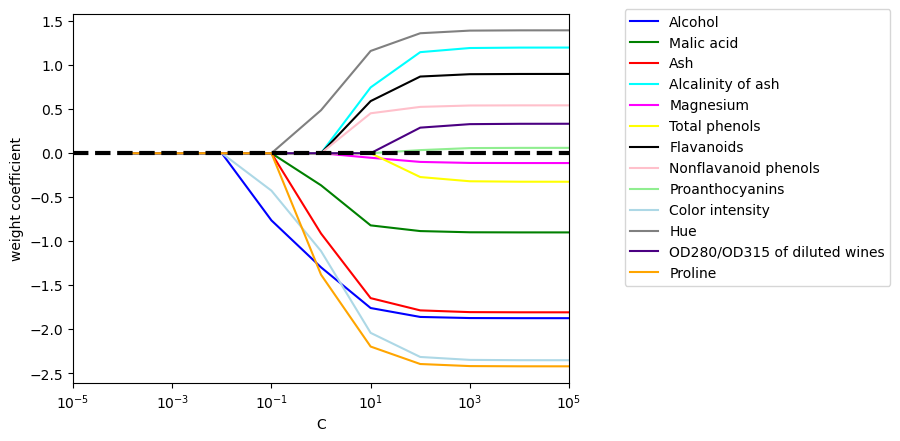

In [94]:
fig = plt.figure()
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black',
          'pink', 'lightgreen', 'lightblue', 'gray', 'indigo', 'orange']
weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c, random_state=0, solver='saga')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
weights = np.array(weights)
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params,weights[:, column],label=df_wine.columns[column + 1],color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center',bbox_to_anchor=(1.38,1.03),ncol=1,fancybox=True)
#plt.savefig('images/04_07.png', dpi=300,
# bbox_inches='tight', pad_inches=0.2)
plt.show()


-   Selección de características de manera aleatoria

In [95]:
df_wine.iloc[:, 1:].sample(n=3, random_state=100, axis=1)


,Hue,Flavanoids,Malic acid
0,1.04,3.06,1.71
1,1.05,2.76,1.78
2,1.03,3.24,2.36
3,0.86,3.49,1.95
4,1.04,2.69,2.59
...,...,...,...
173,0.64,0.61,5.65
174,0.70,0.75,3.91
175,0.59,0.69,4.28
176,0.60,0.68,2.59


##   Actividad Final

Carga la BBDD ("Asignacion_2022_WEB.csv")

In [102]:
data=pd.read_csv("Datos_Clase_07/Datos_Clase_07/Asignacion_2022_WEB.csv",sep=";")
data.describe(include="all")

,ANIO_BENEFICIO,MRUN,QUINTIL_INGRESO,DECIL_DFE,BENEFICIO_BECA_FSCU,TIPO_ALUMNO
count,630687.0,6.306870e+05,630687,630687,630687,630687.000000
unique,NaN,NaN,6,11,21,NaN
top,NaN,NaN,,,GRATUIDAD,NaN
freq,NaN,NaN,418104,418104,475251,NaN
mean,2022.0,1.257975e+07,NaN,NaN,NaN,2.401339
std,0.0,7.273613e+06,NaN,NaN,NaN,0.873217
min,2022.0,5.100000e+01,NaN,NaN,NaN,1.000000
25%,2022.0,6.290625e+06,NaN,NaN,NaN,1.000000
50%,2022.0,1.257510e+07,NaN,NaN,NaN,3.000000
75%,2022.0,1.886592e+07,NaN,NaN,NaN,3.000000


**Pregunta 1** ¿Cuántas columnas y registros tiene la BBDD?

In [109]:
print(f"Tiene {data.dtypes.count()} columnas la base de datos y {len(data)} registros")


Tiene 6 columnas la base de datos y 630687 registros


**Pregunta 2** ¿Cuántos tipos de Beneficios diferentes existen? ¿Cuántos beneficios fueron otorgados en cada tipo?


In [113]:
numero=data["BENEFICIO_BECA_FSCU"].value_counts()
print(numero)



GRATUIDAD    475251
BNM           46318
BBIC          33790
FSCU          28894
BJGM          14987
BEA            8361
BET            8059
BVP            5560
BART           5236
BHPE           2146
TRASPASO        979
BJGME           333
BVP3            296
BUDM            279
BVP2            125
BSA              20
BIBERO           20
TITULAR          17
BPDT              9
BPACIFICO         6
BARCIS            1
Name: BENEFICIO_BECA_FSCU, dtype: int64


**Pregunta 3** ¿Cuántos tipos de alumnos existen en la BBDD? ¿Cuántos estudiantes aparecen registrados en cada tipo?


In [118]:
tipos_estudiante=data["TIPO_ALUMNO"].unique()
print(f"Los tipos de estudiantes son {tipos_estudiante}")
cantidad_estudiante=data["TIPO_ALUMNO"].value_counts()
print(f"La cantidad de estudiantes por tipo son: \n{cantidad_estudiante}")

Los tipos de estudiantes son [1 3 2]
La cantidad de estudiantes por tipo son: 
3    417804
1    164685
2     48198
Name: TIPO_ALUMNO, dtype: int64


**Pregunta 4** ¿Cuántos estudiantes tuvieron beneficios el año 2023?

In [131]:
print(f"La cantidad de personas beneficiadas con becas son {data[['MRUN']].nunique().sum()}")


La cantidad de personas beneficiadas con becas son 621898


**Pregunta 5** Realizar un mapeo de lo tipos de beneficios y crear una nueva columna categórica con valores discretos.
